Import libraries

In [1]:
import gym
import minihack

from RiccardoWorkSpace.StrategyLibrary2 import Strategy as Strategy
from JacopoWorkSpace.LibraryJacopo import Map
from SelormWorkSpace.MovingLibrary import Moving

import sys
sys.setrecursionlimit(200)

Creation level methods list

In [2]:
def CreateLevel1():

    new_level = minihack.LevelGenerator(w = 11, h = 11)
    new_level.set_start_pos((5, 5))

    new_level.fill_terrain(type='fillrect',flag='L', x1 = 1, y1 = 1, x2 = 4, y2 = 4)
    new_level.fill_terrain(type='fillrect',flag='L', x1 = 6, y1 = 1, x2 = 9, y2 = 4)
    new_level.fill_terrain(type='fillrect',flag='L', x1 = 1, y1 = 6, x2 = 4, y2 = 9)
    new_level.fill_terrain(type='fillrect',flag='L', x1 = 6, y1 = 6, x2 = 9, y2 = 9)

    new_level.fill_terrain(type='fillrect',flag='.', x1 = 2, y1 = 2, x2 = 8, y2 = 8)

    new_level.add_monster(name='coyote',symbol='d', place=(4,4))
    # new_level.add_monster(name='wolf',symbol='d', place=(7, 7))
    
    Enviroment = gym.make("MiniHack-Skill-Custom-v0", des_file = new_level.get_des(), observation_keys=("chars", "pixel"))

    state = Enviroment.reset()

    MapGame = Map(state)
    MapGame.view_map()
    
    return MapGame, Enviroment

Choose level get the map and create joystick

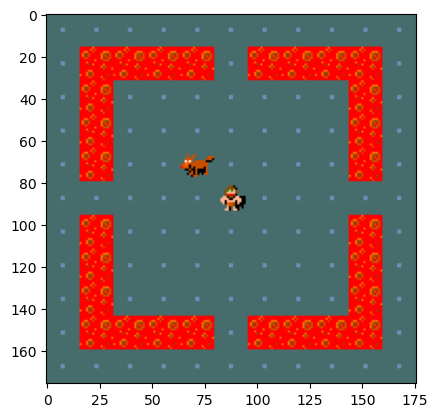

In [3]:
MapGame, Enviroment = CreateLevel1()
Joystick = Moving(Enviroment)

Create joystick, stategy and successor function

In [4]:
def SuccessorFunction(Point):
    
    Result = [(Point[0]-1, Point[1]-1), (Point[0]+1, Point[1]-1),  (Point[0], Point[1]-1),
              (Point[0]-1, Point[1]),   (Point[0]+1, Point[1]),    
              (Point[0]-1, Point[1]+1), (Point[0]+1, Point[1]+1),  (Point[0], Point[1]+1)]
    
    return list(filter(lambda i: MapGame.get_position_symbol(i[0], i[1]) in [".","d","@"], Result))

StrategyLogic = Strategy(SuccessorFunction)
StrategyLogic.ActualGoal = (5, 35)  #<--------- Target

Go to next step

[(10, 39), (10, 40), (9, 40), (8, 41), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 6
[(10, 39), (10, 40), (9, 41), (8, 41), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 6
[(10, 39), (11, 39), (12, 38), (12, 37), (11, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 35)] 7
[(10, 39), (11, 39), (11, 38), (12, 37), (11, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 35)] 7
[(10, 39), (9, 40), (8, 40), (7, 39), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 10
[(10, 39), (9, 40), (8, 40), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 10
[(10, 39), (9, 40), (8, 41), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 10
[(10, 39), (11, 38), (12, 37), (11, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 35)] 11
[(10, 39), (11, 38), (11, 37), (10, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 35)] 11
[(10, 39), (11, 38), (11, 37), (11, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 35)] 11
[(10, 39), (10, 40), (9, 40), (8, 39), 

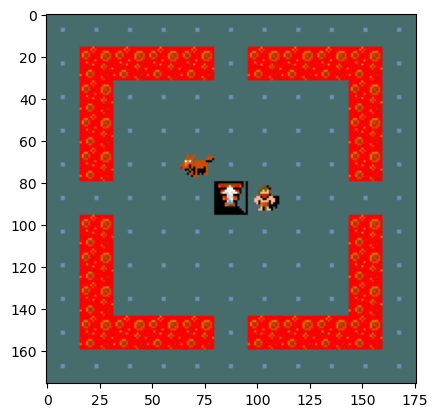

[(10, 40), (11, 40), (10, 41), (9, 42), (8, 41), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 7
[(10, 40), (11, 41), (10, 41), (9, 42), (8, 41), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 7
[(10, 40), (9, 40), (8, 41), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 10
[(10, 40), (9, 41), (8, 41), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 10
[(10, 40), (10, 41), (9, 41), (8, 40), (7, 39), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 11
[(10, 40), (10, 41), (9, 41), (8, 40), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 11
[(10, 40), (10, 41), (9, 41), (8, 41), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 11
[(10, 40), (10, 41), (9, 42), (8, 41), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 11
[(10, 40), (11, 39), (12, 38), (11, 37), (10, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 35)] 12
[(10, 40), (11, 39), (12, 38), (11, 37), (11, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 35)] 12
[(10, 40), (11, 

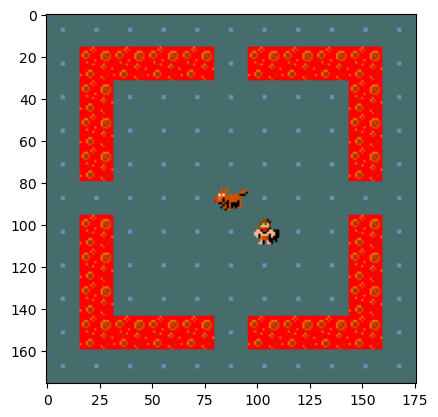

[(11, 40), (10, 41), (9, 42), (8, 41), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 11
[(11, 40), (12, 39), (13, 38), (12, 37), (11, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 35)] 12
[(11, 40), (11, 41), (10, 42), (9, 41), (8, 40), (7, 39), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 12
[(11, 40), (11, 41), (10, 42), (9, 41), (8, 40), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 12
[(11, 40), (11, 41), (10, 42), (9, 41), (8, 41), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 12
[(11, 40), (11, 41), (10, 42), (9, 42), (8, 41), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 12
[(11, 40), (10, 41), (9, 40), (8, 39), (7, 38), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 21
[(11, 40), (10, 41), (9, 40), (8, 39), (7, 39), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 21
[(11, 40), (10, 41), (9, 40), (8, 39), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 21
[(11, 40), (10, 41), (9, 40), (8, 40), (7, 39), (6, 39), (5, 38), (5, 37), (5, 36),

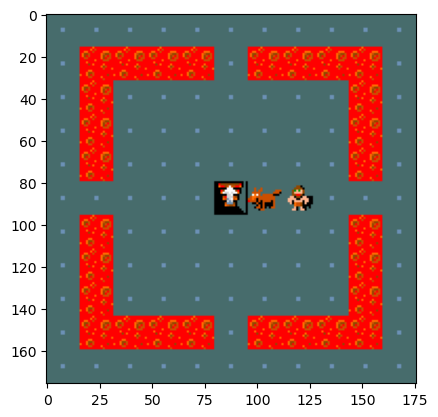

[(10, 41), (11, 42), (10, 43), (9, 42), (8, 41), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 12
[(10, 41), (9, 42), (8, 41), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 20
[(10, 41), (10, 42), (9, 41), (8, 40), (7, 39), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 21
[(10, 41), (10, 42), (9, 41), (8, 40), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 21
[(10, 41), (10, 42), (9, 41), (8, 41), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 21
[(10, 41), (10, 42), (9, 42), (8, 41), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 21
[(10, 41), (11, 42), (10, 41), (9, 40), (8, 39), (7, 38), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 22
[(10, 41), (11, 42), (10, 41), (9, 40), (8, 39), (7, 39), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 22
[(10, 41), (11, 42), (10, 41), (9, 40), (8, 39), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 22
[(10, 41), (11, 42), (10, 41), (9, 40), (8, 40), (7, 39), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 22


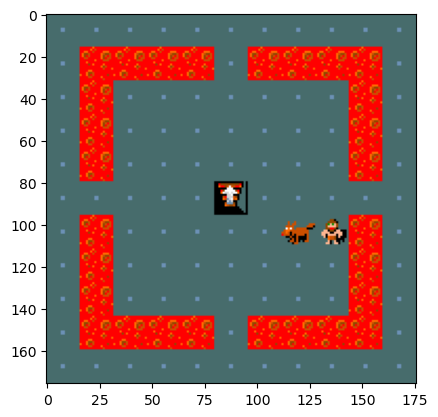

[(11, 42), (10, 43)] 0
Found a 100/100 safe path: [(11, 42), (10, 43)]


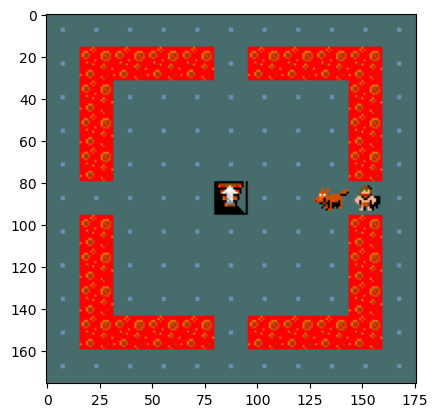

[(10, 43), (9, 44), (10, 43), (9, 42), (8, 41), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 22
[(10, 43), (11, 44), (10, 43), (9, 42), (8, 41), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 22
[(10, 43), (10, 44), (10, 43), (9, 42), (8, 41), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 22
Actual path choosed: [(10, 43), (9, 44), (10, 43), (9, 42), (8, 41), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)]
(10, 43) --> (9, 44)


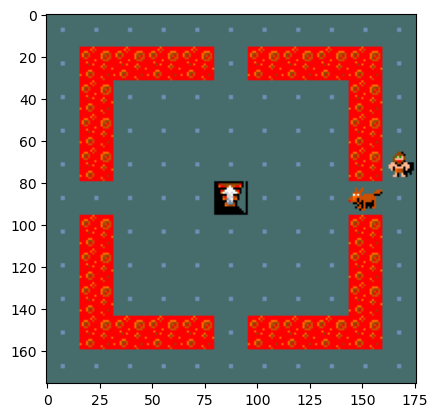

[(9, 44), (8, 44)] 0
Found a 100/100 safe path: [(9, 44), (8, 44)]


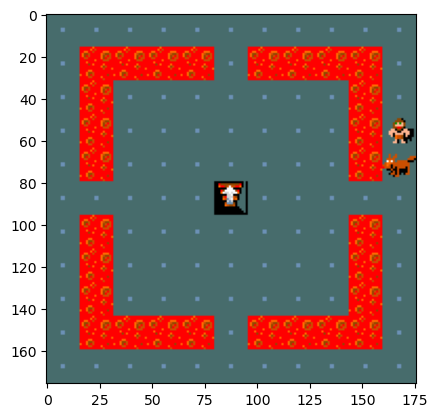

[(8, 44), (7, 44)] 0
Found a 100/100 safe path: [(8, 44), (7, 44)]


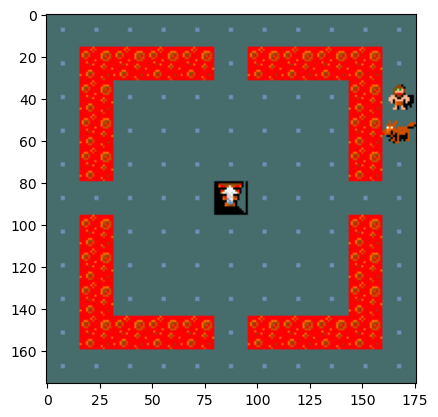

[(7, 44), (6, 44)] 0
Found a 100/100 safe path: [(7, 44), (6, 44)]


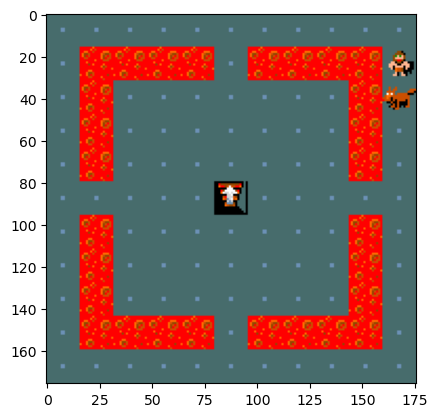

[(6, 44), (5, 43), (5, 42), (5, 41), (5, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 0
[(6, 44), (5, 43), (5, 42), (5, 41), (5, 40), (5, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 0
[(6, 44), (5, 44), (5, 43), (5, 42), (5, 41), (5, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 22
[(6, 44), (5, 44), (5, 43), (5, 42), (5, 41), (5, 40), (5, 39), (5, 38), (5, 37), (5, 36), (5, 35)] 22
Found a 100/100 safe path: [(6, 44), (5, 43), (5, 42), (5, 41), (5, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35)]


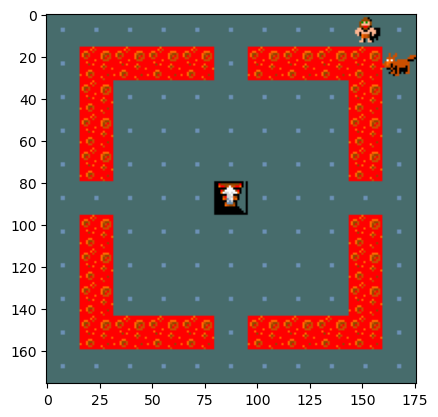

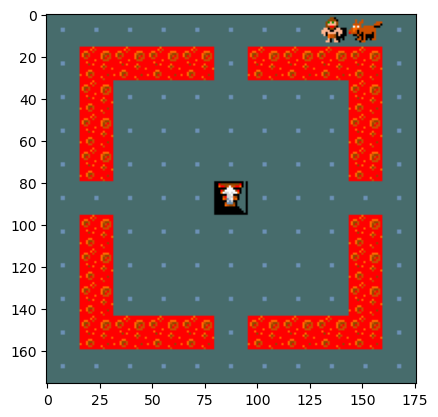

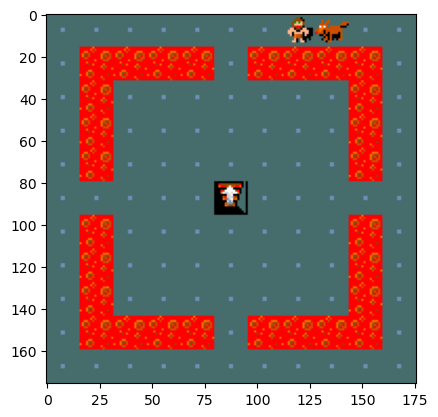

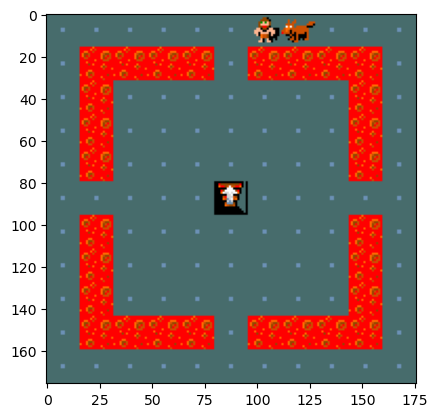

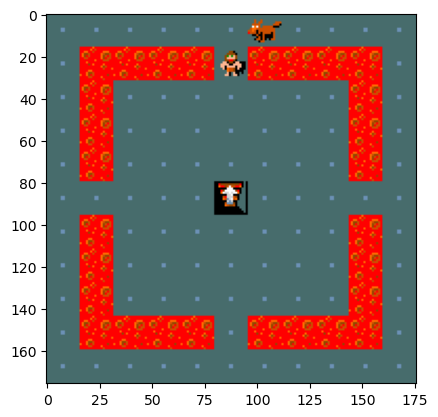

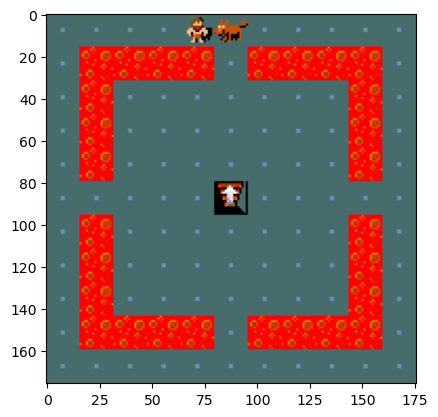

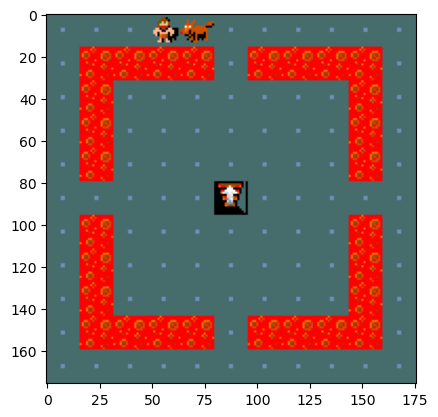

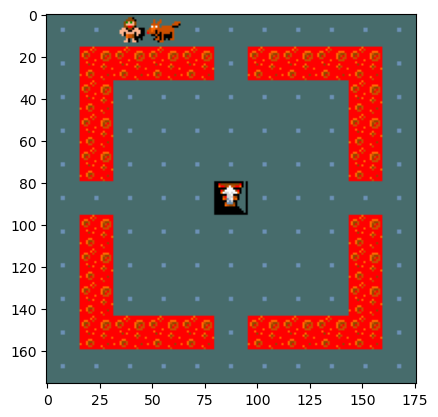

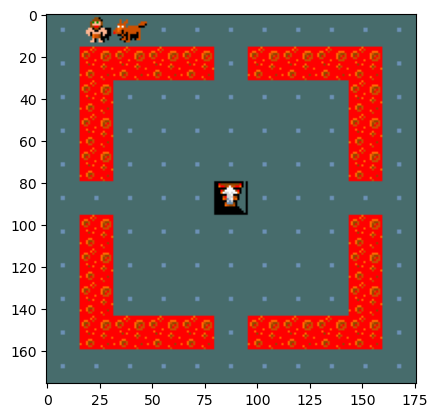

Target reached!


In [5]:
i = 0

while(1):
    CharacterPosition = MapGame.get_player_location()
    MonsterPositions = MapGame.get_monsters_location()

    if CharacterPosition==StrategyLogic.ActualGoal:
        print("Target reached!")
        break

    else:
        NextStep, risk = StrategyLogic.Calculate(CharacterPosition, MonsterPositions,160, "v2", i)
        if risk==0:
            path = StrategyLogic.GetActualPath()
            print(f"Found a 100/100 safe path: {path}")
            for nextstep in path[1:]:
                NewState = Joystick.Move(CharacterPosition, nextstep)
                MapGame = Map(NewState)
                MapGame.view_map()
                CharacterPosition = MapGame.get_player_location()
        else:                
            print(f"Actual path choosed: {StrategyLogic.GetActualPath()}")
            print(f"{CharacterPosition} --> {NextStep}")
            NewState = Joystick.Move(CharacterPosition, NextStep)
            MapGame = Map(NewState)
            MapGame.view_map()
        # print(StrategyLogic.where_will_wolf_go(MonsterPositions,MapGame.get_player_location()))
        # print(MapGame.get_monsters_location())
    i += 1